<a href="https://colab.research.google.com/github/rizqyjoe/Facial_Expression_Recognition_CNN_VGG16/blob/main/Coba4/%20Model%202_Scratch/002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Pre-processing

In [5]:
import tensorflow as tf
import keras
from keras import backend as K
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from keras.utils import np_utils

In [6]:
#load file
data= pd.read_csv('/content/drive/MyDrive/dataset/fer2013 dataset/fer2013/fer2013.csv')
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [7]:
data.emotion.value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

In [8]:
emotion_labels = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
labels=np.array(("Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"))

In [9]:
data.Usage.value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

In [10]:
#split data 
train_set = data[(data.Usage == 'Training')] 
val_set = data[(data.Usage == 'PublicTest')]
test_set = data[(data.Usage == 'PrivateTest')] 
X_train = np.array(list(map(str.split, train_set.pixels)), np.float32) 
X_val = np.array(list(map(str.split, val_set.pixels)), np.float32) 
X_test = np.array(list(map(str.split, test_set.pixels)), np.float32) 
X_train = X_train.reshape(X_train.shape[0], 48, 48, 1) 
X_val = X_val.reshape(X_val.shape[0], 48, 48, 1)
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)

In [11]:
num_classes = 7

y_train = train_set.emotion 
y_train = np_utils.to_categorical(y_train, num_classes) 
y_val = val_set.emotion 
y_val = np_utils.to_categorical(y_val, num_classes) 
y_test = test_set.emotion 
y_test = np_utils.to_categorical(y_test, num_classes)

In [12]:
print("x_train:",X_train.shape)
print("y_train:",y_train.shape)
print("x_val:",X_val.shape)
print("y_val:",y_val.shape)
print("x_test:",X_test.shape)
print("y_test:",y_test.shape)

x_train: (28709, 48, 48, 1)
y_train: (28709, 7)
x_val: (3589, 48, 48, 1)
y_val: (3589, 7)
x_test: (3589, 48, 48, 1)
y_test: (3589, 7)


In [13]:
#data augmentation
datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range = 10,
                             horizontal_flip = True,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             fill_mode = 'nearest')

#datagen = ImageDataGenerator(rescale=1./255)
testgen = ImageDataGenerator(rescale=1./255)

datagen.fit(X_train)
batch_size = 64

In [14]:
train_flow = datagen.flow(X_train, y_train, batch_size=batch_size) 
val_flow = testgen.flow(X_val, y_val, batch_size=batch_size) 
test_flow = testgen.flow(X_test, y_test, batch_size=batch_size)

In [15]:
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot

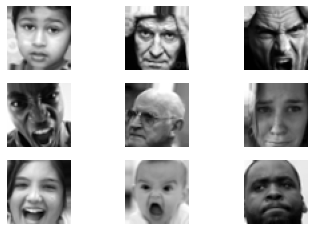

In [16]:
#displaying sample images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    for i in range(0, 9): 
        pyplot.axis('off') 
        pyplot.subplot(330 + 1 + i) 
        pyplot.imshow(X_batch[i].reshape(48, 48), cmap=pyplot.get_cmap('gray'))
    pyplot.axis('off') 
    pyplot.show() 
    break

# Training Model

In [17]:
from keras.models import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, Conv2D, MaxPool2D, BatchNormalization, Activation

input_shape = (48, 48, 1)

model = Sequential()

model.add(Conv2D(filters=64,input_shape=(input_shape),kernel_size=(3,3),padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.6))

model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=num_classes, activation='softmax'))

# print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       7

In [18]:
from keras.optimizers import Adam,SGD,RMSprop

In [19]:
#compile model
adam = Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [20]:
# fit the model
num_epochs = 30
history = model.fit(train_flow, 
                    steps_per_epoch=len(X_train) // batch_size, 
                    epochs=num_epochs,  
                    verbose=1,  
                    validation_data=val_flow,  
                    validation_steps=len(X_val) // batch_size)

Epoch 1/30
448/448 [==============================] - 122s 158ms/step - loss: 3.5816 - accuracy: 0.1699 - val_loss: 1.8671 - val_accuracy: 0.1869
Epoch 2/30
448/448 [==============================] - 68s 152ms/step - loss: 1.9950 - accuracy: 0.1985 - val_loss: 1.8308 - val_accuracy: 0.2492
Epoch 3/30
448/448 [==============================] - 68s 151ms/step - loss: 1.8877 - accuracy: 0.2146 - val_loss: 1.8202 - val_accuracy: 0.2511
Epoch 4/30
448/448 [==============================] - 68s 151ms/step - loss: 1.8524 - accuracy: 0.2271 - val_loss: 1.8002 - val_accuracy: 0.2520
Epoch 5/30
448/448 [==============================] - 68s 151ms/step - loss: 1.8373 - accuracy: 0.2251 - val_loss: 1.7951 - val_accuracy: 0.2503
Epoch 6/30
448/448 [==============================] - 68s 151ms/step - loss: 1.8226 - accuracy: 0.2385 - val_loss: 1.7857 - val_accuracy: 0.2553
Epoch 7/30
448/448 [==============================] - 68s 152ms/step - loss: 1.8052 - accuracy: 0.2440 - val_loss: 1.7822 - val_a

# Evaluate

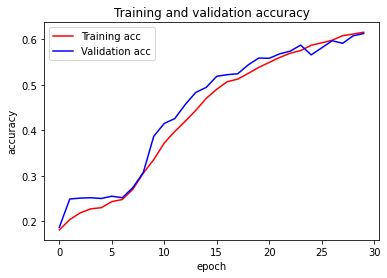

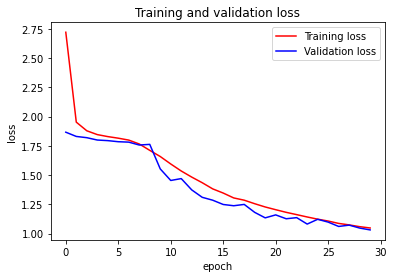

In [21]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
num_epochs = range(len(accuracy))
plt.plot(num_epochs, accuracy, 'r', label='Training acc')
plt.plot(num_epochs, val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')  
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(num_epochs, loss, 'r', label='Training loss')
plt.plot(num_epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')  
plt.xlabel('epoch')
plt.legend()
plt.show()

In [22]:
trainloss = model.evaluate(train_flow, steps=len(X_train) / batch_size) 
print("Train Loss " + str(trainloss[0]))
print("Train Acc: " + str(trainloss[1]))
valloss = model.evaluate(val_flow, steps=len(X_val) / batch_size) 
print("Val Loss " + str(valloss[0]))
print("Val Acc: " + str(valloss[1]))
testloss = model.evaluate(test_flow, steps=len(X_test) / batch_size) 
print("Test Loss " + str(testloss[0]))
print("Test Acc: " + str(testloss[1]))

448/448 [==============================] - 21s 47ms/step - loss: 0.9388 - accuracy: 0.6475
Train Loss 0.9388467073440552
Train Acc: 0.6474624872207642
56/56 [==============================] - 3s 52ms/step - loss: 1.0314 - accuracy: 0.6127
Val Loss 1.0313544273376465
Val Acc: 0.6127054691314697
56/56 [==============================] - 3s 46ms/step - loss: 0.9891 - accuracy: 0.6172
Test Loss 0.9890927076339722
Test Acc: 0.6171635389328003


In [26]:
def plot_confusion_matrix(y_test, y_pred, classes,
                          normalize=False,
                          title='Unnormalized confusion matrix',
                          cmap=plt.cm.Blues):
    cm = confusion_matrix(y_test, y_pred)
    
    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], 2)
        
    np.set_printoptions(precision=2)
        
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.min() + (cm.max() - cm.min()) / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True expression')
    plt.xlabel('Predicted expression')
    plt.show()

In [24]:
y_pred_ = model.predict(X_test/255., verbose=1)
y_pred = np.argmax(y_pred_, axis=1)
t_te = np.argmax(y_test, axis=1)

113/113 [==============================] - 5s 26ms/step


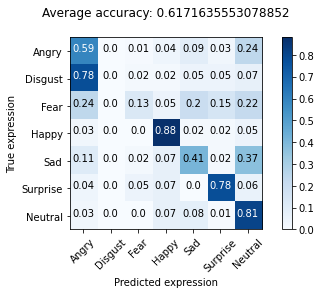

In [27]:
from sklearn.metrics import confusion_matrix, classification_report
import itertools

fig = plot_confusion_matrix(y_test=t_te, y_pred=y_pred,
                      classes=labels,
                      normalize=True,
                      cmap=plt.cm.Blues,
                      title='Average accuracy: ' + str(np.sum(y_pred == t_te)/len(t_te)) + '\n')

In [28]:
emotions = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}
print(classification_report(t_te, y_pred, target_names=emotions.values()))

              precision    recall  f1-score   support

       Angry       0.49      0.59      0.54       491
     Disgust       0.00      0.00      0.00        55
        Fear       0.62      0.13      0.22       528
       Happy       0.83      0.88      0.86       879
         Sad       0.52      0.41      0.46       594
    Surprise       0.71      0.78      0.75       416
     Neutral       0.50      0.81      0.62       626

    accuracy                           0.62      3589
   macro avg       0.52      0.52      0.49      3589
weighted avg       0.62      0.62      0.59      3589



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
model.save("/content/drive/MyDrive/Colab Notebooks/Model/Coba4_Model2_Aug.h5")
print("saved")

saved


#Load Model

In [30]:
from keras.models import load_model
model_load = load_model('/content/drive/MyDrive/Colab Notebooks/Model/Coba4_Model2_noAug.h5')

model_load.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       7

In [31]:
trainloss = model_load.evaluate(train_flow, steps=len(X_train) / batch_size) 
print("Train Loss " + str(trainloss[0]))
print("Train Acc: " + str(trainloss[1]))
valloss = model_load.evaluate(val_flow, steps=len(X_val) / batch_size) 
print("Val Loss " + str(valloss[0]))
print("Val Acc: " + str(valloss[1]))
testloss = model_load.evaluate(test_flow, steps=len(X_test) / batch_size) 
print("Test Loss " + str(testloss[0]))
print("Test Acc: " + str(testloss[1]))

448/448 [==============================] - 24s 50ms/step - loss: 1.1045 - accuracy: 0.6047
Train Loss 1.1044858694076538
Train Acc: 0.6046535968780518
56/56 [==============================] - 3s 48ms/step - loss: 1.0872 - accuracy: 0.6303
Val Loss 1.0872018337249756
Val Acc: 0.630259096622467
56/56 [==============================] - 3s 46ms/step - loss: 1.0243 - accuracy: 0.6495
Test Loss 1.0243152379989624
Test Acc: 0.6494845151901245


In [32]:
def plot_confusion_matrix(y_test, y_pred, classes,
                          normalize=False,
                          title='Unnormalized confusion matrix',
                          cmap=plt.cm.Blues):
    cm = confusion_matrix(y_test, y_pred)
    
    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], 2)
        
    np.set_printoptions(precision=2)
        
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.min() + (cm.max() - cm.min()) / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True expression')
    plt.xlabel('Predicted expression')
    plt.show()

In [33]:
y_pred_ = model_load.predict(X_test/255., verbose=1)
y_pred = np.argmax(y_pred_, axis=1)
t_te = np.argmax(y_test, axis=1)

113/113 [==============================] - 4s 26ms/step


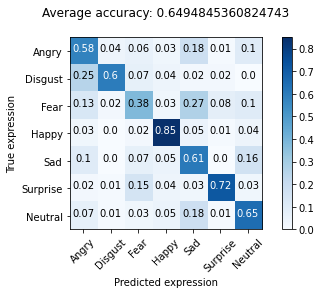

In [34]:
from sklearn.metrics import confusion_matrix, classification_report
import itertools

fig = plot_confusion_matrix(y_test=t_te, y_pred=y_pred,
                      classes=labels,
                      normalize=True,
                      cmap=plt.cm.Blues,
                      title='Average accuracy: ' + str(np.sum(y_pred == t_te)/len(t_te)) + '\n')

In [35]:
emotions = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}
print(classification_report(t_te, y_pred, target_names=emotions.values()))

              precision    recall  f1-score   support

       Angry       0.57      0.58      0.57       491
     Disgust       0.47      0.60      0.53        55
        Fear       0.53      0.38      0.44       528
       Happy       0.87      0.85      0.86       879
         Sad       0.47      0.61      0.53       594
    Surprise       0.80      0.72      0.76       416
     Neutral       0.63      0.65      0.64       626

    accuracy                           0.65      3589
   macro avg       0.62      0.63      0.62      3589
weighted avg       0.66      0.65      0.65      3589



# Predict

In [ ]:
from skimage import io
img = image.load_img('/content/drive/My Drive/s.jpg', grayscale=True, target_size=(48, 48))
show_img=image.load_img('/content/drive/My Drive/s.jpg', grayscale=False, target_size=(200, 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
#print(custom[0])
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(show_img)
plt.show()

m=0.000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i
        
print('Expression Prediction:',emotions_lab[ind])